# Диаметр множества точек(вращающиеся калиперы)

В этом билете мы рассмотрим задачу о нахождении из множества точек $P$ двух самых удаленных друг от друга. Назовем это расстояние **диаметром**($d$) множества точек.

**Вращающиеся калиперы** – это несложный паттерн 
проектирования различных алгоритмом, требующих последовательного обхождения выпуклых многоугольников в $\mathbb{R}^2$. Рассмотрим применение метода на нашей задаче.

**Лемма 1.** *Диаметр множества лежит на выпуклой оболочке этого множества*

*Доказательство.* Докажем от противного.  
Пусть мы нашли диаметр множства $d(P)=dist(a,b)$, причем, не теряя общности, $b\not\in CH(P)$. Тогда утверждается, что можно пустить луч $ab$ и посмотреть, в какой точке он пересечет выпуклую оболочку. Легко показать, что как минимум одна точка, формирующая ребро выпуклой оболочки, пересеченное лучем, имеет дистанцию до $a$ больше $d(P)$. Ч.т.д.

Исходя из Леммы 1, диаметр можно искать только на выпуклой оболочке.

Давайте построим выпуклую оболочку для 30 случайных точек в двумерном пространстве.

In [12]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 случайных точек в двумерном пространстве
hull = ConvexHull(points)

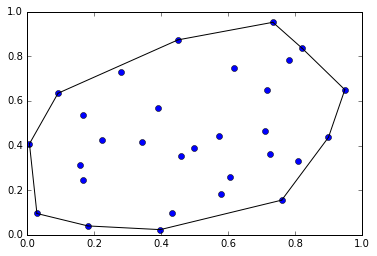

In [25]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
   plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

**Переформулировка задачи.** Пусть $P = (p_1, p_2, ... ,p_n)$ — выпуклый многоугольник, в котором порядок обхода вершин направлен против часовой стрелки, и никакие три последовательные точки не лежат на одной прямой. Найти пару чисел $\langle i$, $j \rangle$, такие, что $d(p_i, p_j)$ максимально.

Прямая $L$ называется **опорной прямой** *(англ. line of support)* для многоугольника $P$, если его внутренность лежит по одну сторону от $L$, при этом $L$ проходит хотя бы через одну из вершин $P$.

**Теорема 1.** Пусть $L_1$ и $L_2$ — две параллельные опорные прямые (калиперы) фигуры $P$, расстояние между которыми имеет максимальное значение. $A_1$ и $A_2$ — граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$. Тогда отрезок $A_1A_2$ перпендикулярен обеим прямым $L_1$ и $L_2$.

*Доказательство.* Докажем от противного.  
Пусть $A_1A_2$ не перпендикулярен обеим прямым $L_1$ и $L_2$. Тогда расстояние между прямыми $L_1$ и $L_2$ было бы меньше, чем отрезок $A_1A_2$, и тем более меньше, чем расстояние между двумя опорными прямыми $L'_1$ и $L'_2$ фигуры $P$, перпендикулярными к отрезку $A_1A_2$, что противоречит условию. Ч.т.д.


**Следствие 1.** Каждая из $L_1$ и $L_2$ содержит единственную граничную точку фигуры $P$.

*Доказательство.* Так как $A_1$ и $A_2$ — какие угодно граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$, то из перпендикулярности отрезка $A_1A_2$ к прямым $L_1$ и $L_2$ следует, что ни одна из прямых $L_1$, $L_2$ не может иметь с фигурой $P$ целый общий отрезок.

**Теорема 2.** Диаметр выпуклого многоугольника равен максимальному расстоянию между параллельными опорными прямыми.

*Доказательство.* Пусть $P$ — выпуклая фигура, $L_1$ и $L_2$ — параллельные опорные прямые, расстояние между которыми имеет наибольшее возможное значение $d$, $A_1$ и $A_2$ — общие точки фигуры $P$ и прямых $L_1$ и $L_2$ соответственно. По предыдущей теореме $A_1A_2$ перпендикулярен к прямым $L_1$, $L_2$, следовательно, его длина равна $d$. Докажем, что расстояние между любыми двумя точками фигуры $P$ не преводходит $d$. Действительно, если $B$ и $C$ — какие-либо две точки фигуры $P$, а $m$ и $n$ — опорные прямые, перпендикулярные к отрезку $BC$, то отрезок $BC$ не превосходит расстояния между прямыми $m$ и $n$, которое в свою очередь не превосходит $d$. Следовательно, длина $BC$ не может быть больше $d$. Ч.т.д.

Заметим, что параллельные опорные прямые можно провести не через любую пару точек.